In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
names=['Id', 'Iteration1', 'Iteration2', 'Iteration3', 'Iteration4', 'Iteration5', 'Iteration6', 'Iteration7', 'Iteration8', 'Iteration9']

In [9]:
speeds_df = pd.read_csv('speeds.dat', sep='\t',names=names)
densities_df = pd.read_csv('densities.dat', sep='\t',names=names)

In [10]:
densities_df

,Id,Iteration1,Iteration2,Iteration3,Iteration4,Iteration5,Iteration6,Iteration7,Iteration8,Iteration9
0,0,0.696721,0.814540,1.02504,1.209850,1.146800,0.992618,0.991815,0.492832,NaN
1,1,1.977670,2.017060,2.03510,2.220110,2.185880,2.224580,1.539520,0.000000,NaN
2,2,0.113960,0.135462,0.17933,0.231214,0.178891,0.285583,0.160453,0.042735,NaN
3,3,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
4,4,0.000000,0.000000,0.00000,0.101010,0.076628,0.082305,0.037037,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
1096,1096,0.000000,0.000000,0.00000,0.401003,0.404858,0.516478,0.467290,0.106326,NaN
1097,1097,0.156250,0.875000,1.13333,0.441176,0.303030,0.878378,1.402440,0.303030,NaN
1098,1098,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1099,1099,4.316410,5.299300,6.10390,6.435190,7.448380,8.305560,5.357140,2.619050,NaN


In [34]:
# 提取Id和Iteration的数据
# 提取Id和Iteration的数据
id_values = speeds_df['Id']
speeds_values = speeds_df.drop('Id', axis=1).values
densities_values = densities_df.drop('Id', axis=1).values

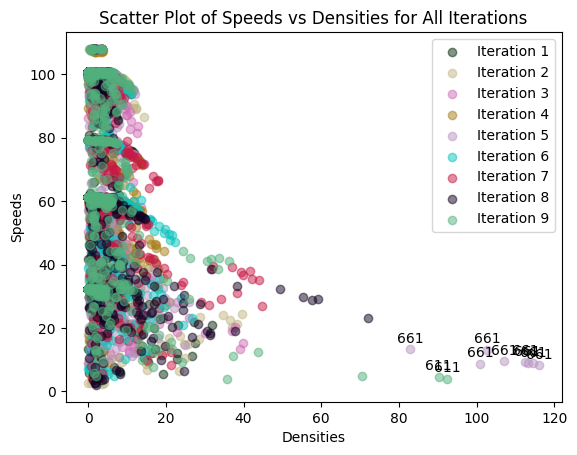

In [35]:
# 生成随机颜色
colors = np.random.rand(len(speeds_df.columns) - 1, 3)

# 绘制散点图
for i in range(len(speeds_df.columns) - 1):
    # 绘制所有点
    plt.scatter(densities_values[i::len(speeds_df.columns) - 1], speeds_values[i::len(speeds_df.columns) - 1], c=[colors[i]], marker='o', alpha=0.5, label=f'Iteration {i+1}')

# 添加标签和标题
plt.xlabel('Densities')
plt.ylabel('Speeds')
plt.title('Scatter Plot of Speeds vs Densities for All Iterations')

# 显示每个点的Id标签（只显示横轴大于80的点）
for i, txt in enumerate(id_values):
    for j in range(len(speeds_df.columns) - 1):
        if densities_values[i, j] > 80:
            plt.annotate(txt, (densities_values[i, j], speeds_values[i, j]), textcoords="offset points", xytext=(0, 5), ha='center')

# 显示图表
plt.legend()
plt.show()